<a href="https://www.kaggle.com/code/ahmedmgelwan/exploratory-data-analysis-for-airbnb-listing-data?scriptVersionId=140505188" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory Data Analysis for Airbnb Listing Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessiona

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/airbnb-new-zelinda-listing/listings (1).csv


## Load Data

In [2]:
df = pd.read_csv('/kaggle/input/airbnb-new-zelinda-listing/listings (1).csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6113,Place to stay in Otaki · 1 bedroom · 1 bed,12177,Dianne,Kapiti Coast District,Ōtaki Ward,-40.75807,175.15637,Private room,107,1,0,NaN,NaN,1,0,0,NaN
1,35325,Home in Queenstown · ★4.89 · 3 bedrooms · 6 be...,152089,Chika,Queenstown-Lakes District,Queenstown-Wakatipu Ward,-45.00497,168.77567,Entire home/apt,249,13,19,2022-11-04,0.26,2,2,1,NaN
2,46071,Home in Omori · ★4.68 · 5 bedrooms · 7 beds · ...,202747,Donna,Taupo District,Turangi-Tongariro Ward,-38.91049,175.75361,Entire home/apt,255,2,19,2023-04-24,0.41,1,328,7,NaN
3,48443,Rental unit in Foxton · 1 bedroom,220702,Tania,Horowhenua District,Kere Kere Ward,-40.48679,175.35016,Private room,117,1,0,NaN,NaN,2,0,0,NaN
4,48445,Rental unit in Foxton · 1 bedroom · 1 bed,220702,Tania,Horowhenua District,Kere Kere Ward,-40.48485,175.34897,Private room,117,1,0,NaN,NaN,2,0,0,NaN


In [3]:
df.shape

(44849, 18)

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44849 entries, 0 to 44848
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              44849 non-null  int64  
 1   name                            44849 non-null  object 
 2   host_id                         44849 non-null  int64  
 3   host_name                       44849 non-null  object 
 4   neighbourhood_group             44849 non-null  object 
 5   neighbourhood                   44849 non-null  object 
 6   latitude                        44849 non-null  float64
 7   longitude                       44849 non-null  float64
 8   room_type                       44849 non-null  object 
 9   price                           44849 non-null  int64  
 10  minimum_nights                  44849 non-null  int64  
 11  number_of_reviews               44849 non-null  int64  
 12  last_review                     

**We find that:**</br>
- `id` : Is identical for each row
- `license` : All values are missing
- `last_review` : Must be a converted to be datetime

In [6]:
df.drop(columns=['id', 'license'], inplace=True)

In [7]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [8]:
df['last_review'].min(), df['last_review'].max()

(Timestamp('2011-10-18 00:00:00'), Timestamp('2023-06-05 00:00:00'))

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,44849.0,1.612904e+08,1.388083e+08,2576.00000,5.024956e+07,1.259360e+08,2.318860e+08,5.179828e+08
latitude,44849.0,-4.000466e+01,3.266882e+00,-46.90673,-4.350043e+01,-3.906556e+01,-3.691816e+01,-3.451609e+01
longitude,44849.0,1.737153e+02,4.149736e+00,-176.55853,1.726422e+02,1.747465e+02,1.754516e+02,1.784795e+02
price,44849.0,3.540610e+02,2.207213e+03,14.00000,1.200000e+02,1.900000e+02,3.000000e+02,1.691790e+05
minimum_nights,44849.0,3.168699e+00,2.419450e+01,1.00000,1.000000e+00,2.000000e+00,2.000000e+00,1.124000e+03
number_of_reviews,44849.0,5.086158e+01,8.735355e+01,0.00000,3.000000e+00,1.600000e+01,5.900000e+01,1.173000e+03
reviews_per_month,39377.0,1.716690e+00,1.923138e+00,0.01000,3.800000e-01,1.040000e+00,2.360000e+00,2.315000e+01
calculated_host_listings_count,44849.0,1.198241e+02,4.862010e+02,1.00000,1.000000e+00,2.000000e+00,5.000000e+00,2.239000e+03
availability_365,44849.0,1.784886e+02,1.313940e+02,0.00000,5.600000e+01,1.730000e+02,3.120000e+02,3.650000e+02
number_of_reviews_ltm,44849.0,1.523568e+01,2.251905e+01,0.00000,0.000000e+00,6.000000e+00,2.100000e+01,2.400000e+02


In [10]:
df.describe(include='object').T

,count,unique,top,freq
name,44849,36639,Home in Auckland · 1 bedroom · 1 bed · 1 share...,120
host_name,44849,7755,Bachcare,2239
neighbourhood_group,44849,67,Auckland,8702
neighbourhood,44849,211,Area Outside Ward,3910
room_type,44849,4,Entire home/apt,34755


In [11]:
df.isna().sum()

name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5472
reviews_per_month                 5472
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [12]:
df.dropna(inplace=True)

## Diving into the dataset to understand each column meaning

In [13]:
df['neighbourhood_group'].nunique()

67

In [14]:
df['neighbourhood_group'].value_counts()

Auckland                     7287
Queenstown-Lakes District    4242
Christchurch City            2298
Tauranga City                1879
Wellington City              1512
                             ... 
Gore District                  43
Stratford District             33
Waimate District               28
Kawerau District                6
Chatham Islands Territory       4
Name: neighbourhood_group, Length: 67, dtype: int64

### What are the most 20 popular neighbourhood group?

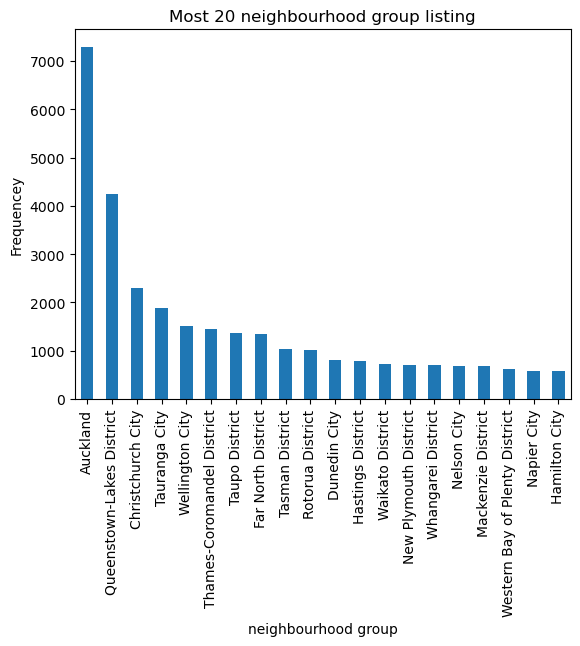

In [15]:
df['neighbourhood_group'].value_counts().head(20).plot(kind='bar')
plt.xlabel('neighbourhood group')
plt.ylabel('Frequencey')
plt.title('Most 20 neighbourhood group listing')
plt.show()

In [16]:
df['neighbourhood'].nunique()

211

## Most popular neighbourhood for each neighbourhood group

In [17]:
df.groupby('neighbourhood_group').agg([pd.Series.mode,'count'])['neighbourhood'].sort_values('count',ascending=False).head(20)

/tmp/ipykernel_32/1056213576.py:1: FutureWarning: ['number_of_reviews_ltm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('neighbourhood_group').agg([pd.Series.mode,'count'])['neighbourhood'].sort_values('count',ascending=False).head(20)


,mode,count
neighbourhood_group,,
Auckland,Waitematā and Gulf Ward,7287
Queenstown-Lakes District,Queenstown-Wakatipu Ward,4242
Christchurch City,Central Ward,2298
Tauranga City,Mount Maunganui-Papamoa Ward,1879
Wellington City,Pukehīnau/Lambton Ward,1512
Thames-Coromandel District,Mercury Bay Ward,1455
Taupo District,Taupō Ward,1374
Far North District,Bay of Islands-Whangaroa Ward,1349
Tasman District,Motueka Ward,1038


### What are diffrent tyoes of rooms availabe?

In [18]:
df['room_type'].nunique()

4

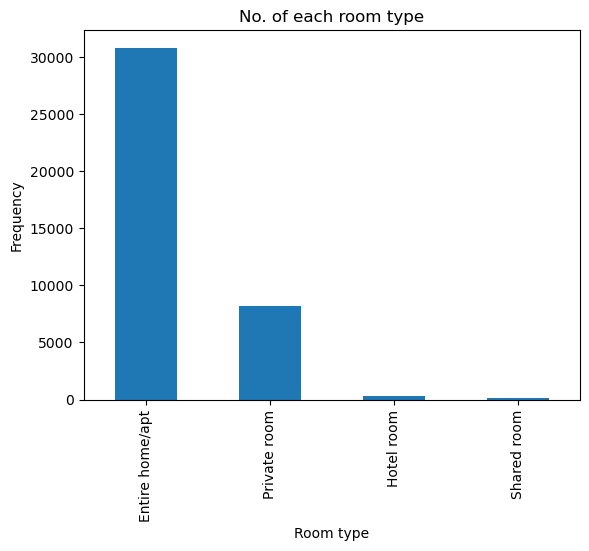

In [19]:
df['room_type'].value_counts().plot(
    kind='bar',
    xlabel='Room type',
    ylabel='Frequency',
    title='No. of each room type'
);

### What is the most popular room type for each neighbourhood group?

In [20]:
df.groupby('neighbourhood_group').agg([pd.Series.mode,'count'])['room_type'].sort_values('count',ascending=False).head(20)

/tmp/ipykernel_32/4166715592.py:1: FutureWarning: ['number_of_reviews_ltm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('neighbourhood_group').agg([pd.Series.mode,'count'])['room_type'].sort_values('count',ascending=False).head(20)


,mode,count
neighbourhood_group,,
Auckland,Entire home/apt,7287
Queenstown-Lakes District,Entire home/apt,4242
Christchurch City,Entire home/apt,2298
Tauranga City,Entire home/apt,1879
Wellington City,Entire home/apt,1512
Thames-Coromandel District,Entire home/apt,1455
Taupo District,Entire home/apt,1374
Far North District,Entire home/apt,1349
Tasman District,Entire home/apt,1038


### What is the most popular neighbourhood group for each type of room

In [21]:
df.groupby('room_type').agg([pd.Series.mode,'count'])['neighbourhood_group'].sort_values('count',ascending=False)

,mode,count
room_type,,
Entire home/apt,Auckland,30797
Private room,Auckland,8146
Hotel room,Auckland,293
Shared room,Auckland,141


*Auckland is the most popular neighbourhood group for all diffrents types of rooms that becouse it it a big city*

### Price for diffrent types of room & neighbourhoods

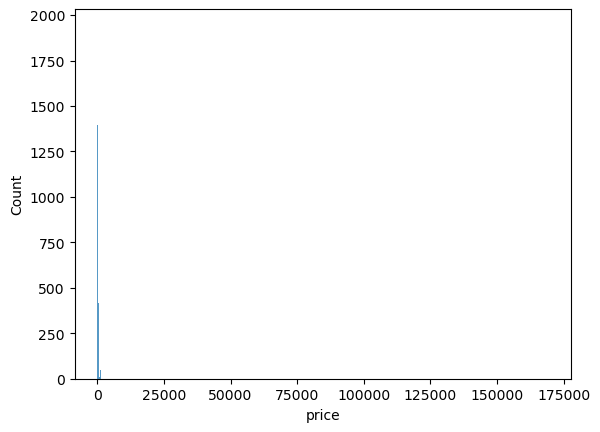

In [22]:
sns.histplot(data=df,x='price');

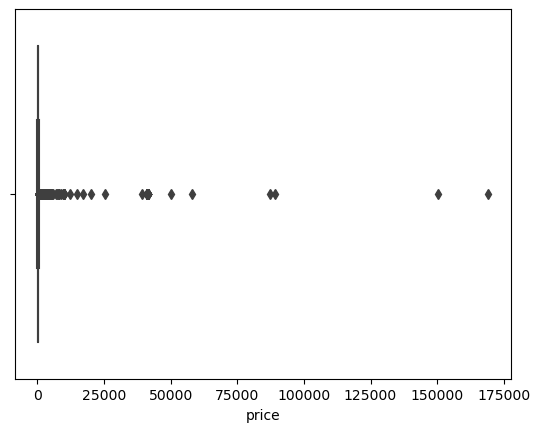

In [23]:
sns.boxplot(data=df,x='price');

*We can not see a clear distrbtion for price becouse of outliers*

#### Removing Outliera

In [24]:
price_q1 = df['price'].quantile(0.25) 
price_q3 = df['price'].quantile(0.75)
price_iqr = price_q3 - price_q1
df_= df[df['price'].between(left=price_q1-1.5 * price_iqr, right=price_q3+1.5*price_iqr)]

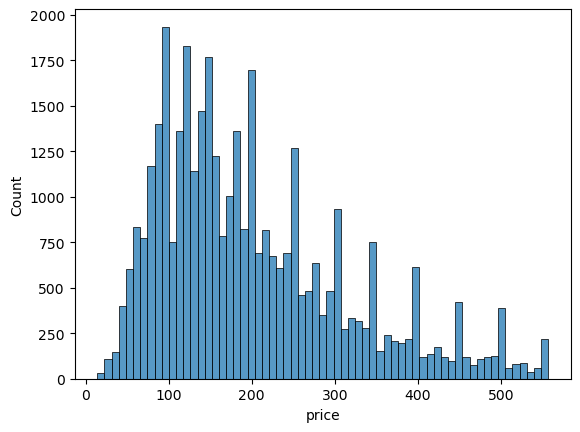

In [25]:
sns.histplot(data=df_,x='price');

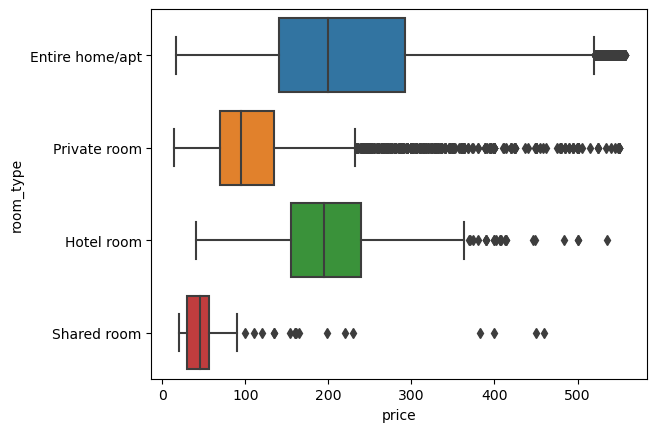

In [26]:
sns.boxplot(data=df_,x='price', y='room_type');

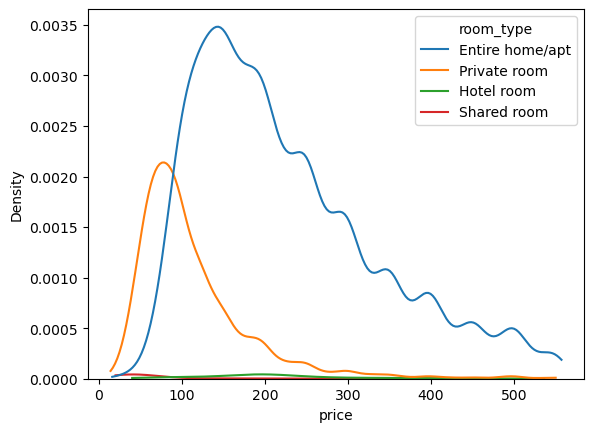

In [27]:
sns.kdeplot(df_,x='price', hue='room_type', cut=0)
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

In [28]:
df_.groupby('room_type').agg(['mean','std','min','max'])['price']

/tmp/ipykernel_32/1538790624.py:1: FutureWarning: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'last_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_.groupby('room_type').agg(['mean','std','min','max'])['price']


,mean,std,min,max
room_type,,,,
Entire home/apt,226.461207,111.734123,16,557
Hotel room,206.780142,93.251971,40,536
Private room,113.434276,70.113444,14,550
Shared room,63.913669,73.215335,20,460


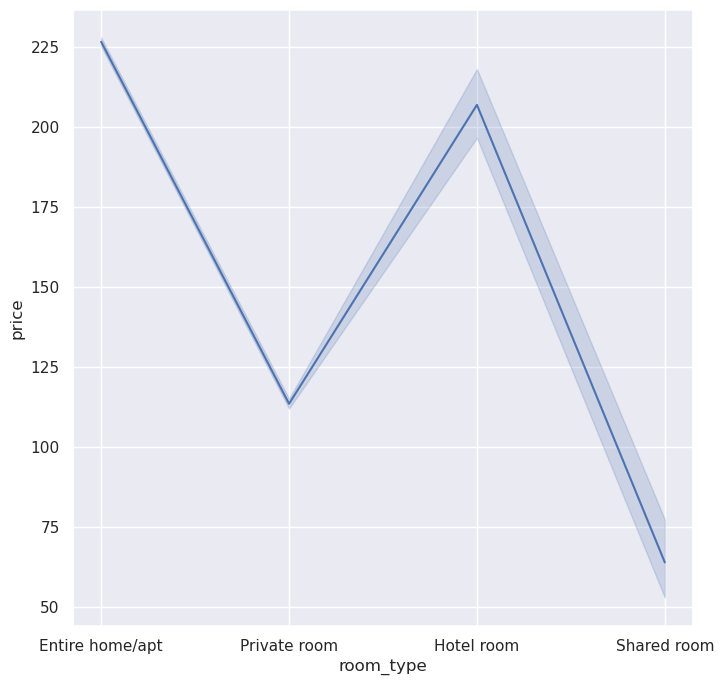

In [29]:
sns.lineplot(data=df_, x='room_type',y='price');

In [30]:
pd.pivot_table(df,index='room_type',columns='neighbourhood_group',aggfunc='mean')

/tmp/ipykernel_32/1115198687.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df,index='room_type',columns='neighbourhood_group',aggfunc='mean')


availability_365                              \
neighbourhood_group Ashburton District    Auckland Buller District   
room_type                                                            
Entire home/apt             213.850000  170.189994      225.918367   
Hotel room                  119.000000  167.420000             NaN   
Private room                164.515152  151.732299      246.804878   
Shared room                 157.272727  125.131579      349.000000   

                                                                     \
neighbourhood_group Carterton District Central Hawke's Bay District   
room_type                                                             
Entire home/apt             225.400000                   222.912281   
Hotel room                         NaN                          NaN   
Private room                225.909091                   234.000000   
Shared room                        NaN                          NaN   

                                                                      \
neighbourhood_group Central Otago District Chatham Islands Territory   
room_type                                                              
Entire home/apt                 207.886228                    329.25   
Hotel room                             NaN                       NaN   
Private room                    193.088235                       NaN   
Shared room                     348.000000                       NaN   

                                                                    ...  \
neighbourhood_group Christchurch City Clutha District Dunedin City  ...   
room_type                                                           ...   
Entire home/apt            172.606578      221.913043   152.608084  ...   
Hotel room                 248.636364      364.000000   266.000000  ...   
Private room               143.583086      187.657143   155.330396  ...   
Shared room                156.300000             NaN    36.000000  ...   

                    reviews_per_month                                   \
neighbourhood_group  Waitaki District Waitomo District Wellington City   
room_type                                                                
Entire home/apt              2.679031            2.765        2.362946   
Hotel room                        NaN              NaN        0.323000   
Private room                 1.310656            1.754        1.746809   
Shared room                  0.760000              NaN        0.618500   

                                                                      \
neighbourhood_group Western Bay of Plenty District Westland District   
room_type                                                              
Entire home/apt                           1.368314          3.259716   
Hotel room                                     NaN          2.640000   
Private room                              0.985591          2.370635   
Shared room                               0.572500               NaN   

                                                                              \
neighbourhood_group Whakatane District Whanganui District Whangarei District   
room_type                                                                      
Entire home/apt               1.301801           2.607520           1.609262   
Hotel room                         NaN           0.020000           0.286667   
Private room                  1.495714           1.164844           1.204206   
Shared room                   0.080000           0.140000                NaN   

                                                          
neighbourhood_group Ōpōtiki District Ōtorohanga District  
room_type                                                 
Entire home/apt             1.136528            2.516585  
Hotel room                       NaN                 NaN  
Private room                0.660000            1.627143  
Shared room                      NaN            0.480000  

[4 

### Room availability

In [31]:
df_['availability_365'].nunique(), df['availability_365'].min(),df['availability_365'].max()

(366, 0, 365)

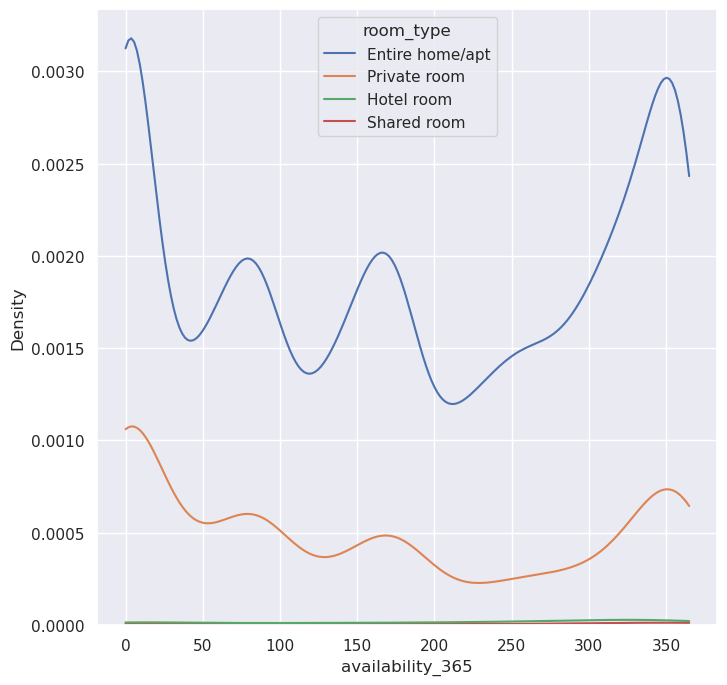

In [32]:
sns.kdeplot(df_,x='availability_365',hue='room_type',cut=0);

### Mean Availabilty for each room type

In [33]:
df.groupby('room_type').mean()['availability_365'].round()

/tmp/ipykernel_32/1216396041.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('room_type').mean()['availability_365'].round()


room_type
Entire home/apt    181.0
Hotel room         208.0
Private room       155.0
Shared room        213.0
Name: availability_365, dtype: float64

<Axes: xlabel='room_type', ylabel='availability_365'>

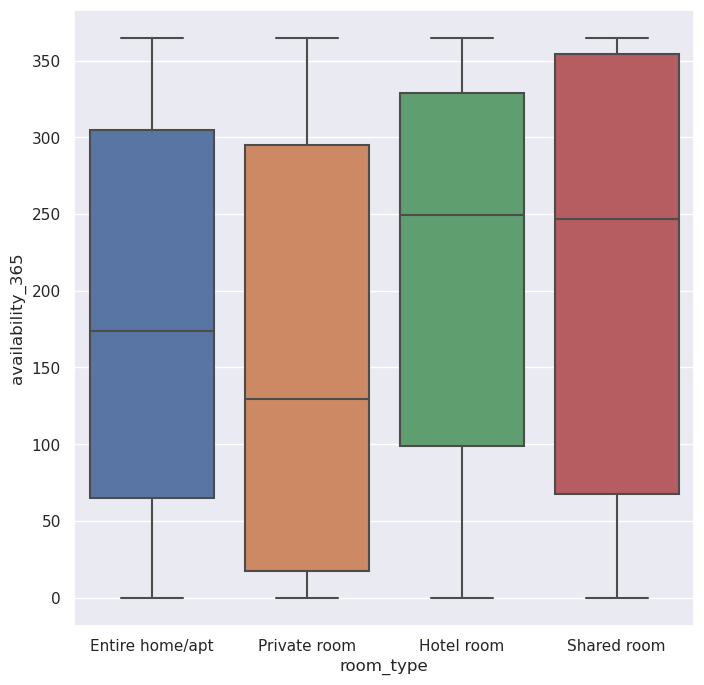

In [34]:
sns.boxplot(df_,y='availability_365',x='room_type')

## Number of reviews

In [35]:
df_['number_of_reviews'].nunique(), df_['number_of_reviews'].min(),df_['number_of_reviews'].max()

(660, 1, 1173)

In [36]:
df_['number_of_reviews'].describe()

count    36815.000000
mean        60.541763
std         93.112806
min          1.000000
25%          7.000000
50%         25.000000
75%         73.000000
max       1173.000000
Name: number_of_reviews, dtype: float64

In [37]:
# Removing Outliers
rev_q1 = df['number_of_reviews'].quantile(0.25)
rev_q3 = df['number_of_reviews'].quantile(0.75)
rev_iqr = rev_q3 - rev_q1
df_ = df_[df_['number_of_reviews'].between(left=rev_q1-1.5*rev_iqr, right=rev_q3+1.5*rev_iqr)]

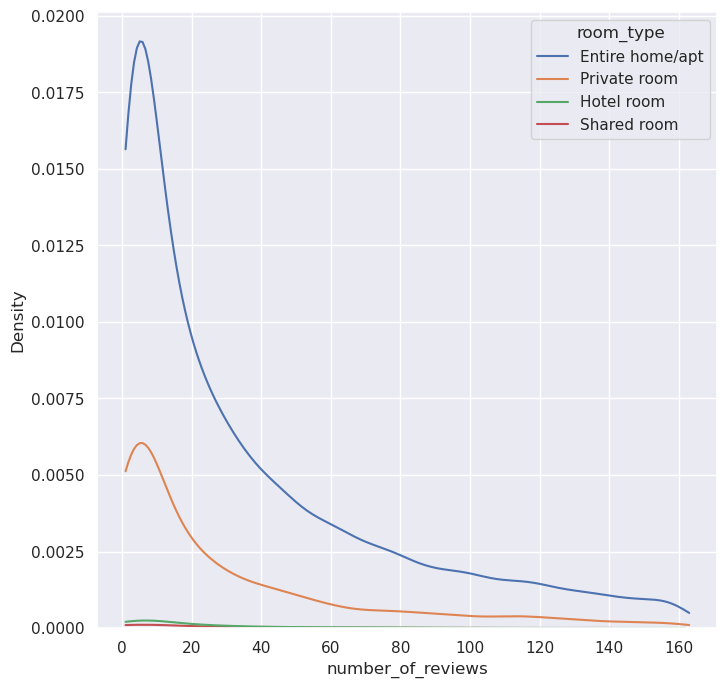

In [38]:
sns.kdeplot(df_, x='number_of_reviews',hue='room_type',cut=0);

<Axes: xlabel='number_of_reviews', ylabel='room_type'>

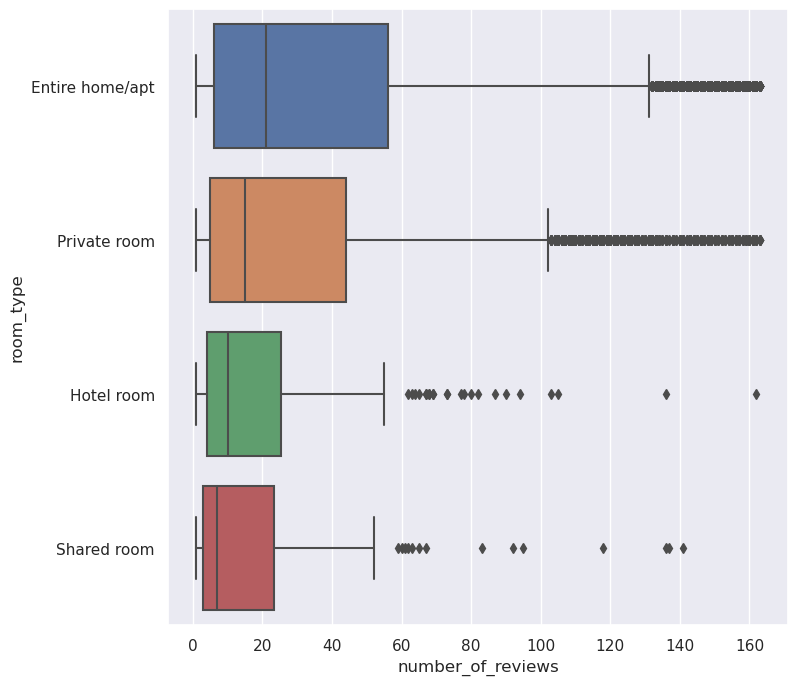

In [39]:
sns.boxplot(df_,x='number_of_reviews', y='room_type')

## minimum_nights

In [40]:
df_['minimum_nights'].nunique(),df['minimum_nights'].min(), df['minimum_nights'].max()

(52, 1, 1124)

In [41]:
df_['minimum_nights'].describe()

count    33162.000000
mean         2.817954
std         23.922402
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max       1124.000000
Name: minimum_nights, dtype: float64

In [42]:
# Removing Outliers
mn_q1 = df['minimum_nights'].quantile(0.25)
mn_q3 = df['minimum_nights'].quantile(0.75)
mn_iqr = mn_q3 - mn_q1
df_ = df_[df_['minimum_nights'].between(left=mn_q1-1.5*mn_iqr, right=mn_q3+1.5*mn_iqr)]

In [43]:
df_['minimum_nights'].describe()

count    31094.000000
mean         1.663633
std          0.633871
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: minimum_nights, dtype: float64

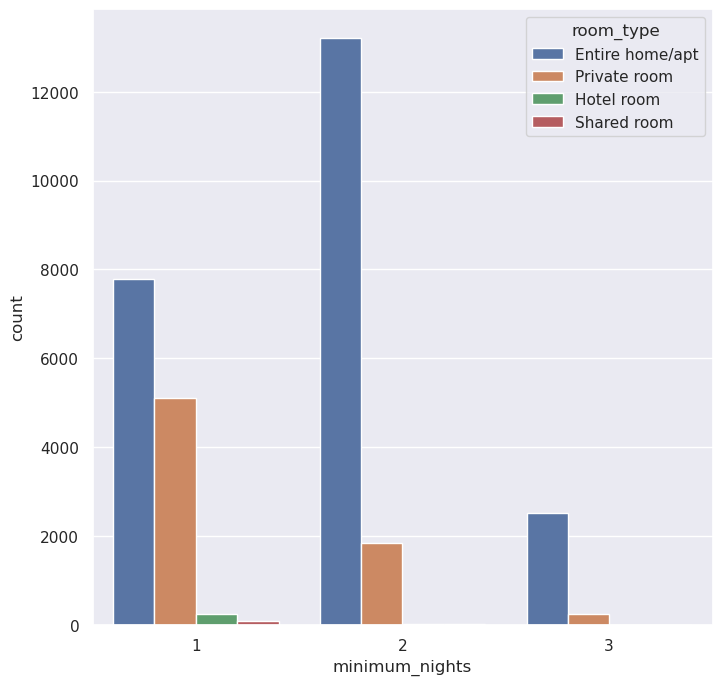

In [44]:
sns.countplot(df_,x='minimum_nights',hue='room_type');

<Axes: xlabel='minimum_nights', ylabel='price'>

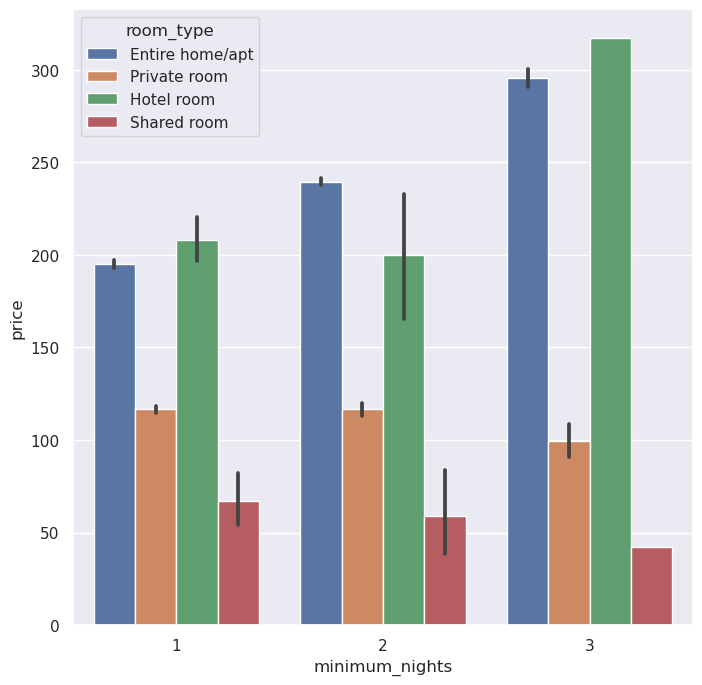

In [45]:
sns.barplot(df_,x='minimum_nights',y='price',hue='room_type')

In [46]:
df_['reviews_per_month'].nunique()

1029

In [47]:
df_['reviews_per_month'].describe()

count    31094.000000
mean         1.550337
std          1.709514
min          0.010000
25%          0.400000
50%          1.010000
75%          2.040000
max         18.570000
Name: reviews_per_month, dtype: float64

In [48]:
# Removing Outliers
mr_q1 = df['reviews_per_month'].quantile(0.25)
mr_q3 = df['reviews_per_month'].quantile(0.75)
mr_iqr = mr_q3 - mr_q1
df_ = df_[df_['reviews_per_month'].between(left=mr_q1-1.5*mr_iqr, right=mr_q3+1.5*mr_iqr)]

In [49]:
df_['reviews_per_month'].describe()

count    29833.000000
mean         1.300160
std          1.159194
min          0.010000
25%          0.380000
50%          0.990000
75%          1.890000
max          5.330000
Name: reviews_per_month, dtype: float64

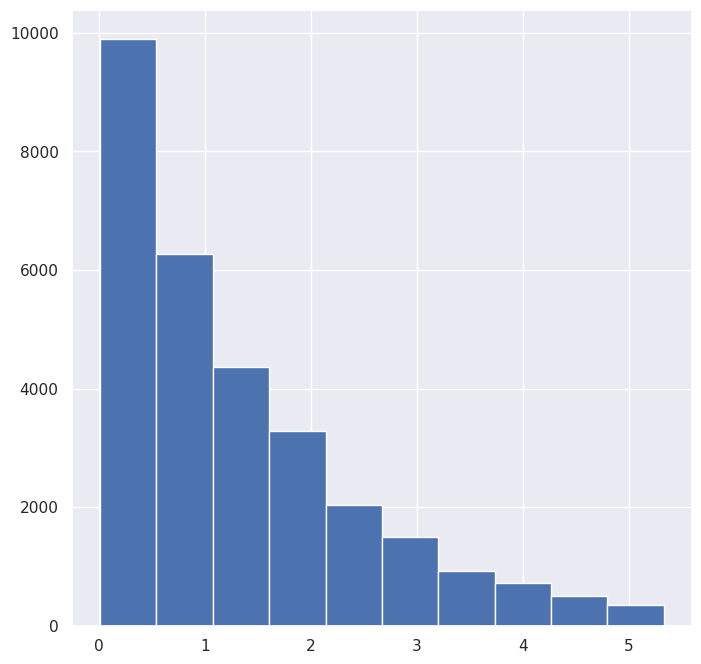

In [50]:
df_['reviews_per_month'].hist();

<Axes: xlabel='reviews_per_month', ylabel='Density'>

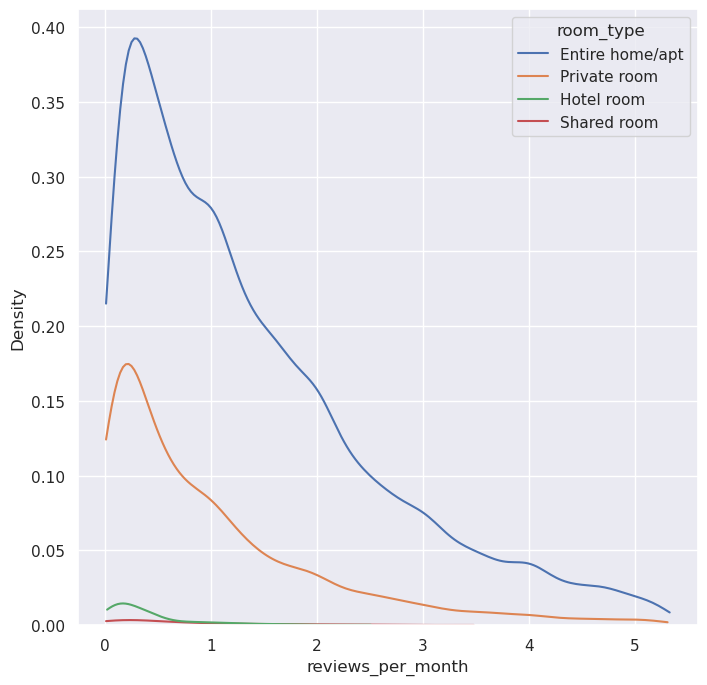

In [51]:
sns.kdeplot(df_,x='reviews_per_month', hue='room_type',cut=0)

In [52]:
df_['host_id'].nunique()

19199

In [53]:
df_.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).head()

,neighbourhood_group,host_id
1,Auckland,5431
35,Queenstown-Lakes District,2645
7,Christchurch City,1700
48,Tauranga City,1400
49,Thames-Coromandel District,1203
